# Lanzini--Numerical Simulation--Exercises 04

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

# Results
In order to equilibrate the system, I set as input **Nblocks = N_eq** and **Nsteps = 1**. I therefore performed **N_eq** times the MD code to reach equilibrium. Temperature is in graphics of kinetic energy, multiplied by factor $\frac{3}{2}$

## Solid

**Starting temperature : 1.5**. After equilibration, T reaches the desired value 0.8.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

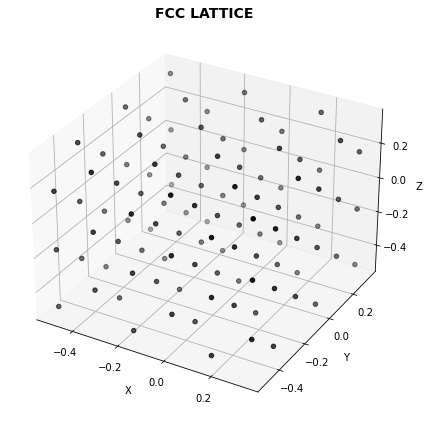

In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
ffcc=open("configfcc.txt", "r")
x, y, z = np.loadtxt("configfcc.txt",  usecols=(0, 1, 2), unpack='true')

fig=plt.figure(figsize=(8,6))
axes = plt.axes(projection="3d")
axes.scatter3D(x,y,z,color="black")
axes.set_title("FCC LATTICE",fontsize=14,fontweight="bold")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_zlabel("Z")
plt.tight_layout()
plt.show()

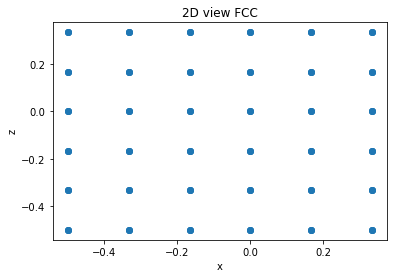

In [3]:
#starting configuration 2d
plt.scatter(x, z)
plt.title('2D view FCC')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

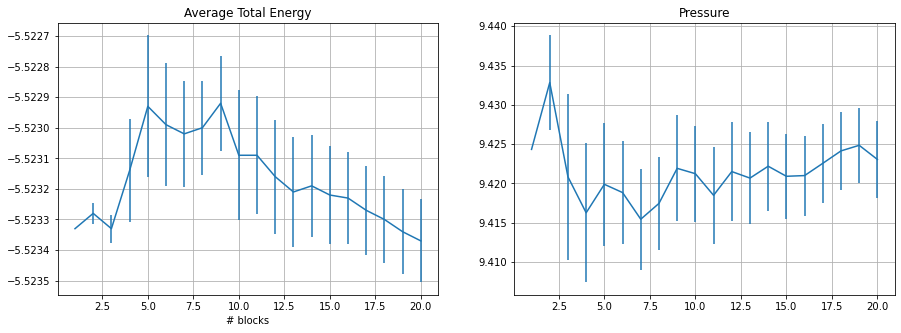

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

f1=open("Solid_ekin.txt", "r")
f2=open("Solid_epot.txt", "r")
f3=open("Solid_etot.txt", "r")
f4=open("Solid_pressure.txt", "r")
f5=open("Solid_temp.txt", "r")



blocks, pressure, error_p = np.loadtxt("solid_pressure.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')


blocks, etot, error_et = np.loadtxt("solid_etot.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

ax1.errorbar(blocks, etot, error_et)
ax1.set_title("Average Total Energy")
ax1.set_xlabel("# blocks")
ax2.errorbar(blocks, pressure, error_p)
ax2.set_title("Pressure")
ax1.set_xlabel("# blocks")




ax1.grid(True)
ax2.grid(True)


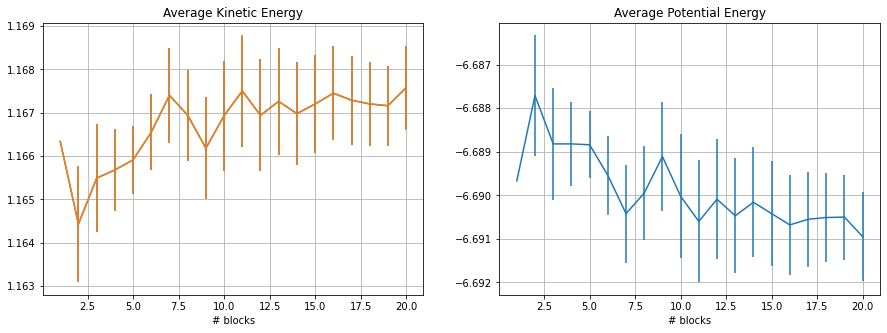

In [5]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

blocks, ekin, error_ekin = np.loadtxt("solid_ekin.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')
blocks, temp, error_temp = np.loadtxt("solid_temp.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

blocks, epot, error_epot = np.loadtxt("solid_epot.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

ax3.errorbar(blocks, ekin, error_ekin)
ax3.errorbar(blocks, 3/2 * temp, 3/2 *error_temp)
ax3.set_title("Average Kinetic Energy")
ax3.set_xlabel("# blocks")

ax4.errorbar(blocks, epot, error_epot)
ax4.set_title("Average Potential Energy")
ax4.set_xlabel("# blocks")




ax3.grid(True)
ax4.grid(True)

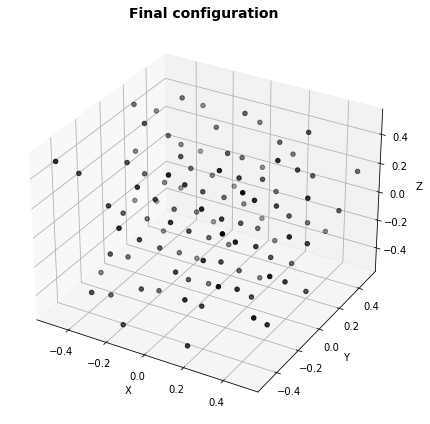

In [6]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

f20=open("solid_final_config.txt", "r")
f21=open("solid_final_config2.txt", "r")


x, y, z = np.loadtxt("solid_final_config.txt",  usecols=(0, 1, 2), delimiter='   ', unpack='true')


fig=plt.figure(figsize=(8,6))
axes = plt.axes(projection="3d")
axes.scatter3D(x,y,z,color="black")
axes.set_title("Final configuration",fontsize=14,fontweight="bold")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_zlabel("Z")
plt.tight_layout()
plt.show()

Final config: a little disordered.

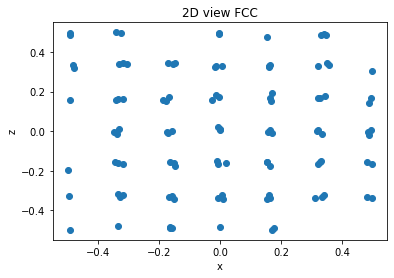

In [7]:
plt.scatter(x, z)
plt.title('2D view FCC')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

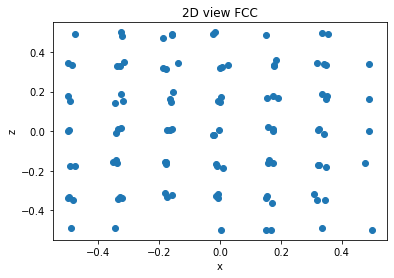

In [8]:
x, y, z = np.loadtxt("solid_final_config2.txt",  usecols=(0, 1, 2), delimiter='   ', unpack='true')
plt.scatter(x, z)
plt.title('2D view FCC')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

## Liquid

**Starting temperature : 2**. After equilibration, T reaches the desired value **1.1**.

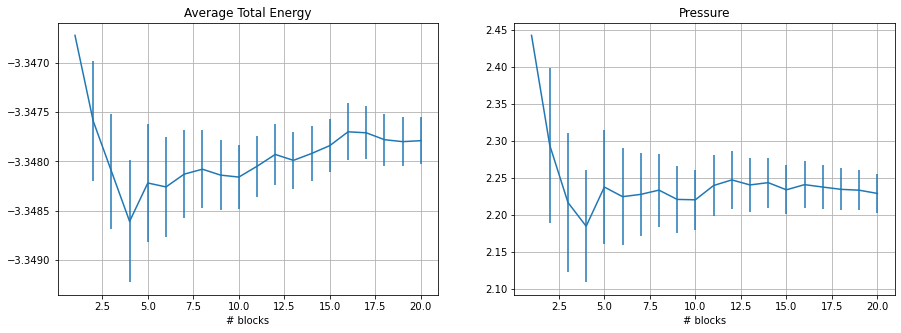

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


f6=open("Liquid_ekin.txt", "r")
f7=open("Liquid_epot.txt", "r")
f8=open("Liquid_etot.txt", "r")
f9=open("Liquid_pressure.txt", "r")
f10=open("Liquid_temp.txt", "r")

blocks, pressure, error_p = np.loadtxt("Liquid_pressure.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')


blocks, etot, error_et = np.loadtxt("Liquid_etot.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

ax1.errorbar(blocks, etot, error_et)
ax1.set_title("Average Total Energy")
ax1.set_xlabel("# blocks")
ax2.errorbar(blocks, pressure, error_p)
ax2.set_title("Pressure")
ax2.set_xlabel("# blocks")




ax1.grid(True)
ax2.grid(True)


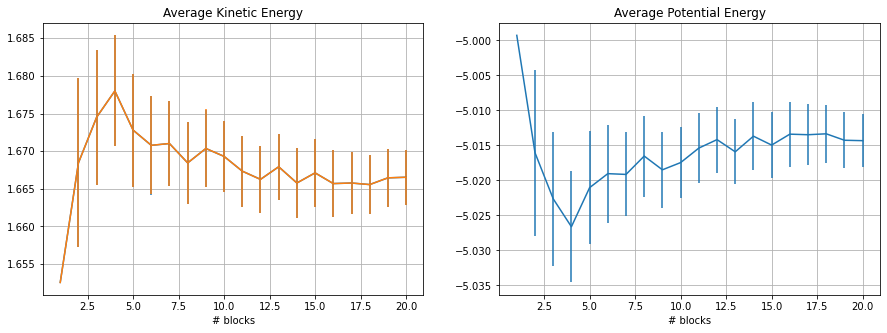

In [10]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

blocks, ekin, error_ekin = np.loadtxt("liquid_ekin.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')
blocks, temp, error_temp = np.loadtxt("liquid_temp.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

blocks, epot, error_epot = np.loadtxt("liquid_epot.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

ax3.errorbar(blocks, ekin, error_ekin)
ax3.errorbar(blocks, 3/2 * temp, 3/2 *error_temp)
ax3.set_xlabel("# blocks")
ax3.set_title("Average Kinetic Energy")
ax4.errorbar(blocks, epot, error_epot)
ax4.set_title("Average Potential Energy")
ax4.set_xlabel("# blocks")



ax3.grid(True)
ax4.grid(True)

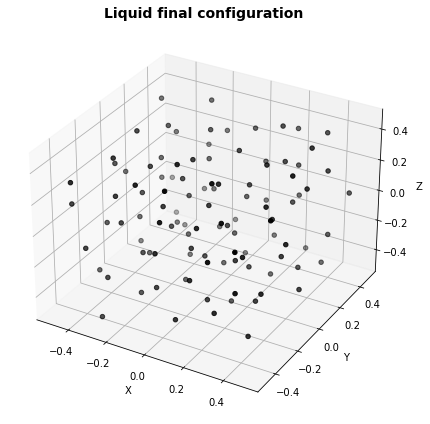

In [11]:
f20=open("liquid_final_config.txt", "r")
x, y, z = np.loadtxt("liquid_final_config.txt",  usecols=(0, 1, 2), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(8,6))
axes = plt.axes(projection="3d")
axes.scatter3D(x,y,z,color="black")
axes.set_title("Liquid final configuration",fontsize=14,fontweight="bold")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_zlabel("Z")
plt.tight_layout()
plt.show()

## Gas

Starting T before equilibration (2000 steps) **T=1.1**. **T** reaches 1.2 during that time.

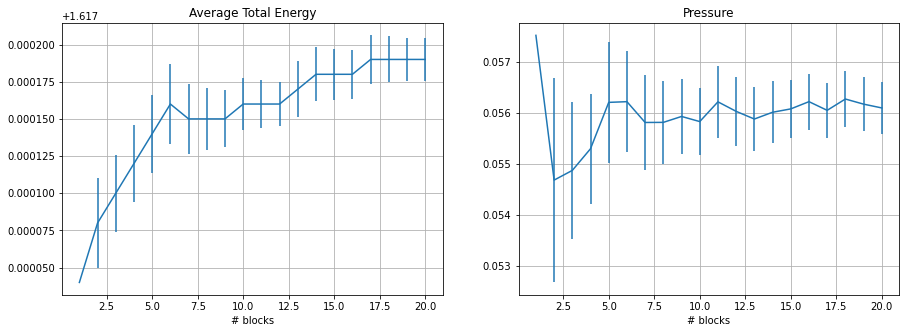

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


f6=open("Gas_ekin.txt", "r")
f7=open("Gas_epot.txt", "r")
f8=open("Gas_etot.txt", "r")
f9=open("Gas_pressure.txt", "r")
f10=open("gas_temp.txt", "r")

blocks, pressure, error_p = np.loadtxt("gas_pressure.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')


blocks, etot, error_et = np.loadtxt("gas_etot.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

ax1.errorbar(blocks, etot, error_et)
ax1.set_xlabel("# blocks")
ax1.set_title("Average Total Energy")
ax2.errorbar(blocks, pressure, error_p)
ax2.set_title("Pressure")
ax2.set_xlabel("# blocks")



ax1.grid(True)
ax2.grid(True)

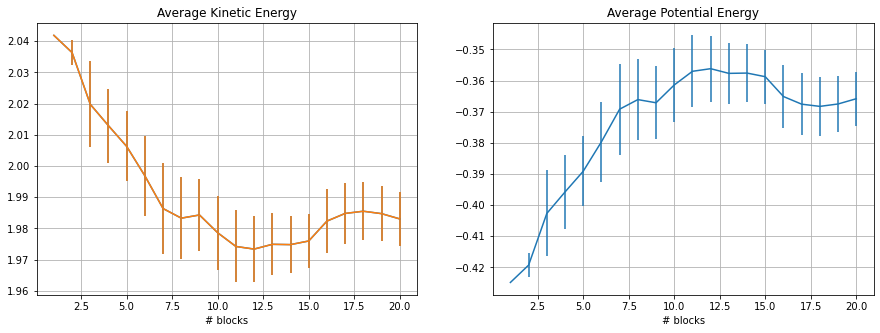

In [13]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

blocks, ekin, error_ekin = np.loadtxt("gas_ekin.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')
blocks, temp, error_temp = np.loadtxt("gas_temp.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

blocks, epot, error_epot = np.loadtxt("gas_epot.txt",  usecols=(0, 2, 3), delimiter=' ', unpack='true')

ax3.errorbar(blocks, ekin, error_ekin)
ax3.errorbar(blocks, 3/2 * temp, 3/2 *error_temp)
ax3.set_xlabel("# blocks")
ax3.set_title("Average Kinetic Energy")
ax4.errorbar(blocks, epot, error_epot)
ax4.set_title("Average Potential Energy")
ax4.set_xlabel("# blocks")



ax3.grid(True)
ax4.grid(True)

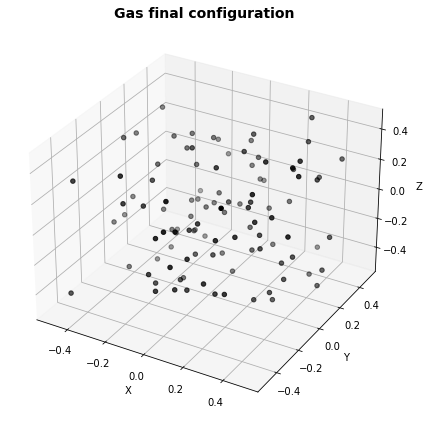

In [14]:
f23=open("gas_config.txt", "r")


x, y, z = np.loadtxt("gas_config.txt",  usecols=(0, 1, 2), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(8,6))
axes = plt.axes(projection="3d")
axes.scatter3D(x,y,z,color="black")
axes.set_title("Gas final configuration",fontsize=14,fontweight="bold")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_zlabel("Z")
plt.tight_layout()
plt.show()